In [8]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model.coordinate_descent import ConvergenceWarning
from sklearn.pipeline import Pipeline
import warnings

In [9]:
def notEmpty(s):
    return s != ''

In [10]:
mpl.rcParams['font.sans-serif']=[u'simHei']
mpl.rcParams['axes.unicode_minus']=False
## 拦截异常
warnings.filterwarnings(action = 'ignore', category=ConvergenceWarning)

In [13]:
names = ['CRIM','ZN', 'INDUS','CHAS','NOX','RM','AGE','DIS','RAD','TAX','PTRATIO','B','LSTAT']
path = "./boston_housing.data"
## 由于数据文件格式不统一，所以读取的时候，先按照一行一个字段属性读取数据，然后再按照每行数据进行处理
fd = pd.read_csv(path, header=None)
data = np.empty((len(fd), 14))
for i, d in enumerate(fd.values):
    d = map(float, filter(notEmpty, d[0].split(' ')))
    data[i] = list(d)

x, y = np.split(data, (13,), axis=1)
y = y.ravel()


In [42]:
##Pipeline
models=[
    Pipeline([
        ('ss',StandardScaler()),
        ('GBDT',GradientBoostingRegressor(n_estimators=100, learning_rate=1.0, max_depth=3))
    ]),
    Pipeline([
        ('ss',StandardScaler()),
        ('DTR',DecisionTreeRegressor(criterion='mse',max_depth=10))
    ]),
    Pipeline([
        ('ss',StandardScaler()),
        ('linear',LinearRegression(fit_intercept=True))
    ])
]

In [44]:
# 对数据集进行测试集合训练集划分
X_train,X_test,Y_train,Y_test = train_test_split(x, y, test_size=0.2, random_state=0)

['#ff0000', '#aa0055', '#5500aa', '#0000ff']


<Figure size 864x432 with 0 Axes>

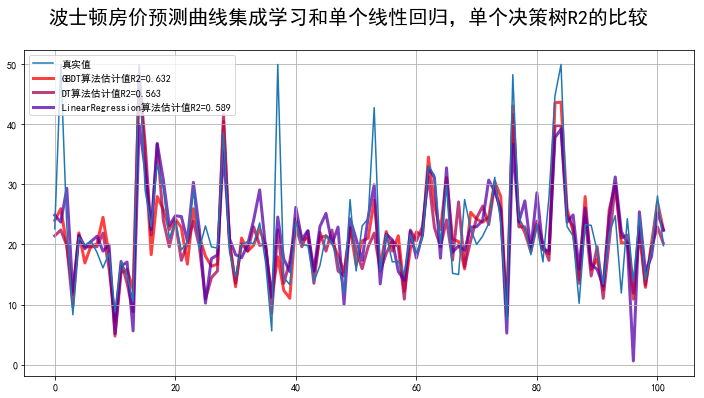

In [47]:
#模型训练
titles=['GBDT','DT','LinearRegression']
plt.figure(figsize=(12,6),facecolor='w') #创建绘图窗口，设置大小，设置颜色
# for t in range(4):
t=np.arange(len(X_test))
# print(t)
# N=4
# d_pool=np.arange(1,N,1)
# m=d_pool.size
clrs=[]
for c in np.linspace(16711680,255,4):
    clrs.append('#%06x'%int(c))
print(clrs)
line_width=3

plt.figure(figsize=(12,6),facecolor='w') #创建绘图窗口，设置大小，设置颜色
# for i,d in enumerate(d_pool):
# plt.subplot(N-1,1,i+1)
plt.plot(t, Y_test, '-', label=u'真实值', ms=10, zorder=N)
for j in range(3):
    models[j].fit(X_train, Y_train) # 模型训练
    y_hat = models[j].predict(X_test)
    s = models[j].score(X_test, Y_test)

    label = u'%s算法估计值R2=%.3f' % (titles[j],s)
    plt.plot(t, y_hat, color=clrs[j], lw=line_width, alpha=0.75, label=label, zorder=z)
    plt.legend(loc = 'upper left')
    plt.grid(True)

## 预测值和实际值画图比较
plt.suptitle(u"波士顿房价预测曲线集成学习和单个线性回归，单个决策树R2的比较", fontsize=20)
plt.grid(b=True)
plt.show()  